# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.2.0 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240L, 320L)

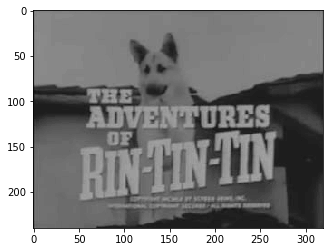

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=100)

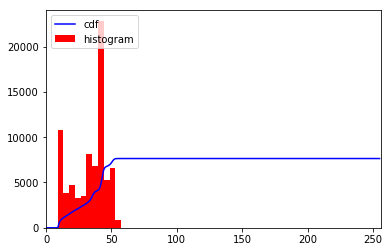

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),np.amax(rintin_gray.flatten()),[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

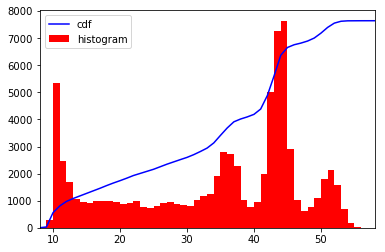

In [8]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([np.amin(rintin_gray.flatten()),np.amax(rintin_gray.flatten())])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


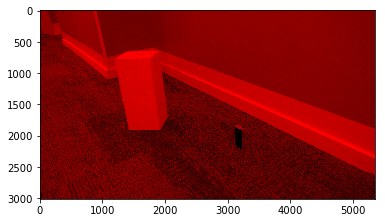

In [97]:
import copy
cxs = cv2.imread("hall_box_battery1.jpg")
cxs = cv2.cvtColor(cxs, cv2.COLOR_BGR2RGB)
plt.imshow(cxs)

cxsver = cxs.copy()
cxsver[:,:,1] = 0
cxsver[:,:,2] = 0


plt.imshow(cxsver)

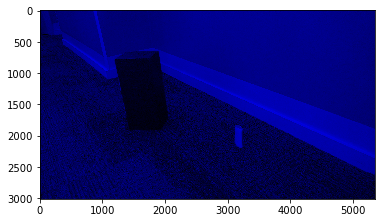

In [98]:
plt.imshow(cxs)

cxsaz = cxs.copy()
cxsaz[:,:,1] = 0
cxsaz[:,:,0] = 0


plt.imshow(cxsaz)

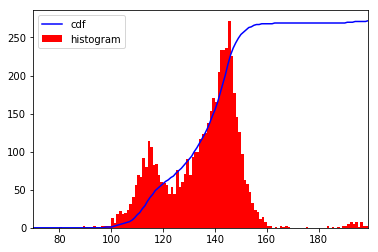

In [99]:
auxv=cxsver[:,:,0][0]
hist,bins = np.histogram(auxv.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()


plt.plot(cdf_normalized, color = 'b')
plt.hist(auxv.flatten(),256,[0,256], color = 'r')
plt.xlim([np.amin(auxv.flatten())+1,np.amax(auxv.flatten())])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

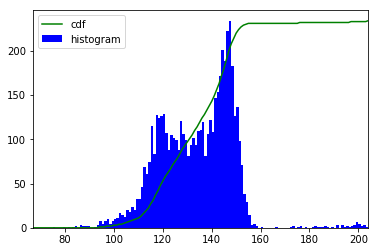

In [100]:
auxa=cxsaz[:,:,2][0]
hist,bins = np.histogram(auxa.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()


plt.plot(cdf_normalized, color = 'g')
plt.hist(auxa.flatten(),256,[0,256], color = 'b')
plt.xlim([np.amin(auxa.flatten())+1,np.amax(auxa.flatten())])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

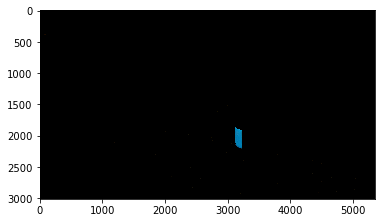

In [107]:
hsv = cv2.cvtColor(cxs, cv2.COLOR_RGB2HSV)


lower_red = np.array([0,0,0])
upper_red = np.array([25,255,255])

maska = cv2.inRange(cxs, lower_red, upper_red)
resa = cv2.bitwise_and(cxs,cxs, mask= maska)

plt.imshow(resa)

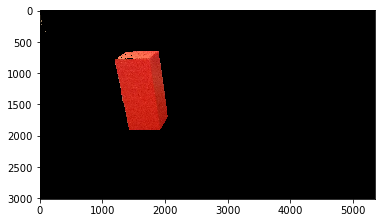

In [117]:
hsv = cv2.cvtColor(cxs, cv2.COLOR_RGB2HSV)


lower_red = np.array([150,0,0])
upper_red = np.array([360,255,100])

maska = cv2.inRange(cxs, lower_red, upper_red)
resa = cv2.bitwise_and(cxs,cxs, mask= maska)

plt.imshow(resa)